# Simulating Power Spectra

The goal of this notebook and the next is to explore how different spectral parameters can influence band ratios. 

In this notebook we simulate power spectra and then analyze our simulations in the next notebook. 

Here we will use FOOOF to generate PSDs with aperiodic and periodic parameters. 

Each simulation will vary a single parameter across a range while the remaining parameters remain constant. 

Note that in this case, the notebook can be used as an example of the simulated power spectra, but the actual set of all spectra simulated for the analysis is done in a script available in `/scripts`. 

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from fooof.sim import *
from fooof import FOOOFGroup, FOOOF

In [2]:
# Import custom project code
import sys
sys.path.append('../bratios')
from settings import *

### Simulate PSDs where band power varies

First we will make several power spectra where only the power of the upper band varies.

In [3]:
# Settings
FREQ_RANGE = [1,50]
LOW_BAND = [4,8]
HIGH_BAND = [15,25]
EXP_DEF = [0,1]

CF_HIGH_DEF = np.mean(HIGH_BAND)
BW_DEF = 1

PW_START = 0
PW_END = 1.5
W_INC = .1

EXP_DEF = [0, 1]
EXP_START = .25
EXP_END = 3
EXP_INC = .25

PW_DEMO = '../dat/misc/PW_DEMO'
EXP_PW_DEMO = '../dat/misc/EXP_PW_DEMO'

In [4]:
# The Stepper object iterates through a range of values
pw_step = Stepper(PW_START, PW_END, PW_INC)
num_spectra = len(pw_step)

# amp_iter is a generater which returns a set of parameters with the next amp_step value
pw_iter = param_iter([CF_HIGH_DEF, pw_step, BW_DEF])

# Generates several PSDs 
pw_fs, pw_ps, pw_syns = gen_group_power_spectra(num_spectra, FREQ_RANGE, EXP_DEF, pw_iter)

# Aggregate data
pw_data = [pw_fs, pw_ps, pw_syns]

#Save data
np.save(PW_DEMO, pw_data)

Here are the first and last spectra to show the range of amplitude we are simulating here.

In [5]:
# Initialize FOOOF model object
fg = FOOOFGroup(verbose=False)

# Add data and fit FOOOF models
fg.add_data(pw_fs, pw_ps)
fg.fit()

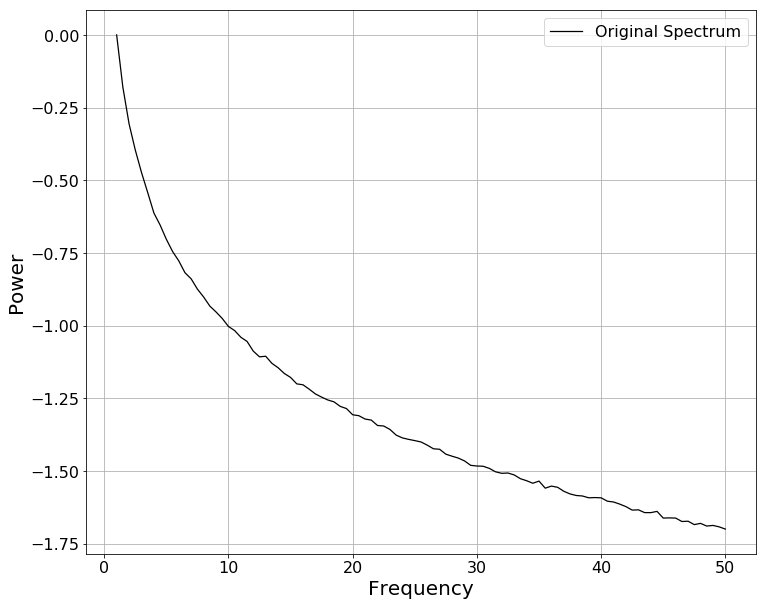

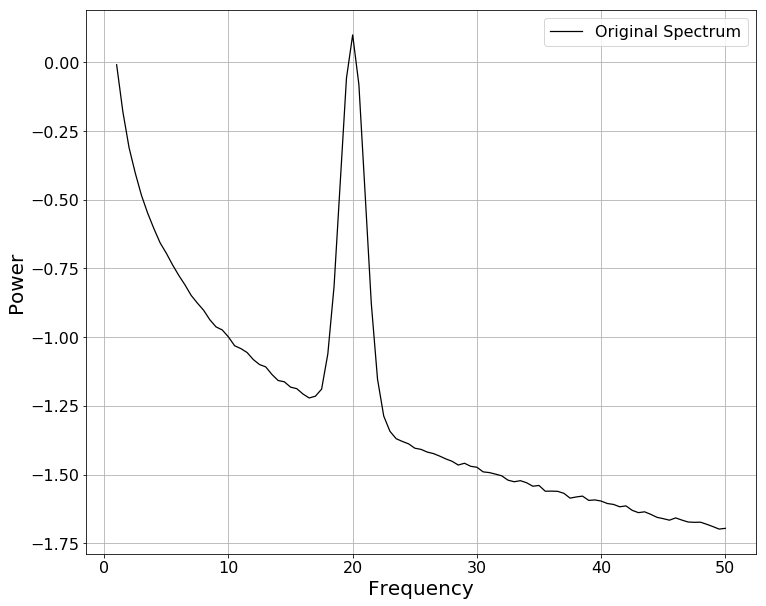

In [6]:
# Plot some example simulated spectra
fg.get_fooof(0).plot()
fg.get_fooof(num_spectra-1).plot()

This simulation only varied one parameter while keeping all other parameters constant. 

This next simulation demonstrates when we have two parameters changing at the same time.

## Simulate PSDs where amplitude and aperiodic component vary

This section will generate data where the aperiod exponent varys while power for a higher band oscillation also varies. 

The total number of trials will be (number_of_amplitude_changes) * (number_of_aperiodic_changes).

In [7]:
data = []

exp_step = Stepper(EXP_START, EXP_END, EXP_INC)
for exp in exp_step:
        
    # Low band sweeps through amplitude range
    pw_step = Stepper(PW_START, PW_END, PW_INC)
    pw_iter = param_iter( [CF_HIGH_DEF, pw_step, BW_DEF])
    
    # Generates data
    pw_apc_fs, pw_apc_ps, pw_apc_syns = gen_group_power_spectra(len(pw_step), FREQ_RANGE, [0, exp], pw_iter)
    data.append(np.array([exp, pw_apc_fs, pw_apc_ps], dtype=object))

np.save(EXP_PW_DEMO, data)

In [8]:
fm_1 = FOOOF(min_peak_height=0.05, verbose=False)
fm_1.add_data(data[0][1], data[0][2][0])
fm_1.fit()

fm_2 = FOOOF(min_peak_height=0.05, verbose=False)
fm_2.add_data(data[0][1], data[-1][2][-1])
fm_2.fit()

Here we plot the power spectrum with the lowest high-band power and exponent values and the spectrum with the highest high-band power and exponent. Notice the y-axis to truly appreciate the range of aperiodic values.

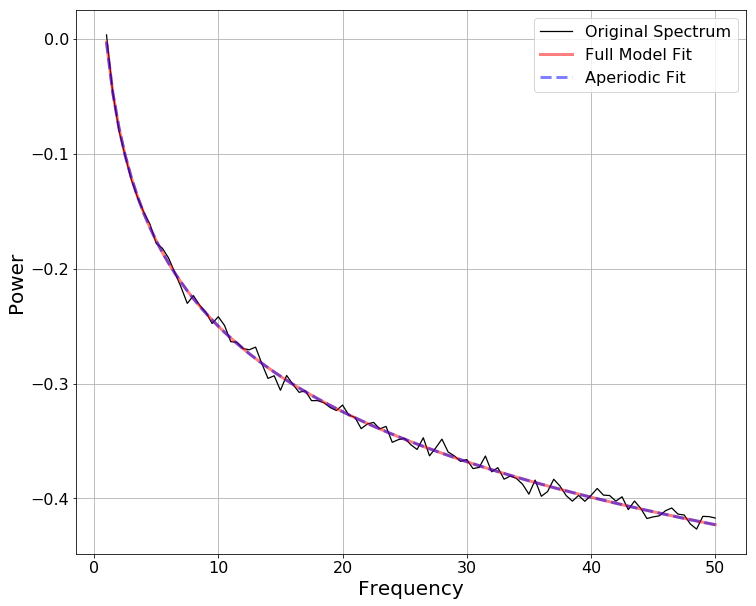

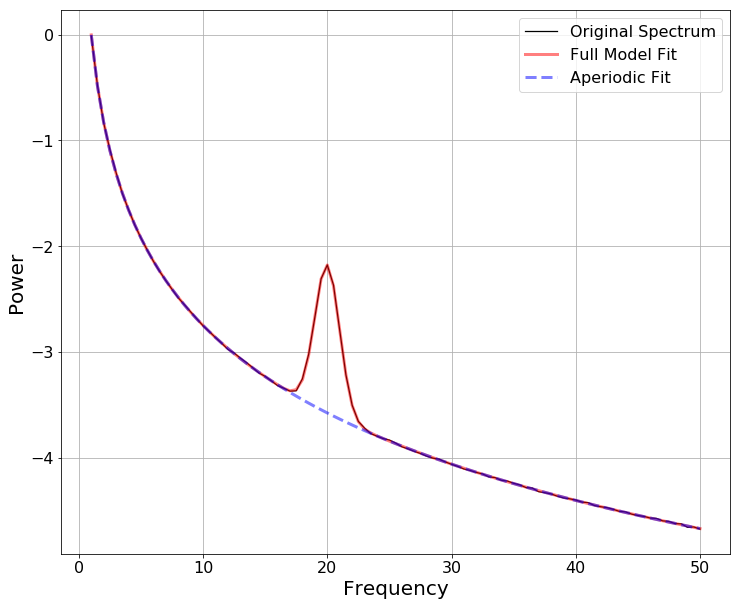

In [9]:
fm_1.plot()
fm_2.plot()

In the next notebook we will calculate band ratios and see how changing these parameters affects ratio measures